In [15]:
import pandas as pd
import warnings
import logging
# Data Loading
df = pd.read_csv("Training.csv")


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df["prognosis"])
df["prognosis"] = encoder.transform(df["prognosis"])

x = df.iloc[:, :-1]  # Features
y = df["prognosis"]  #target


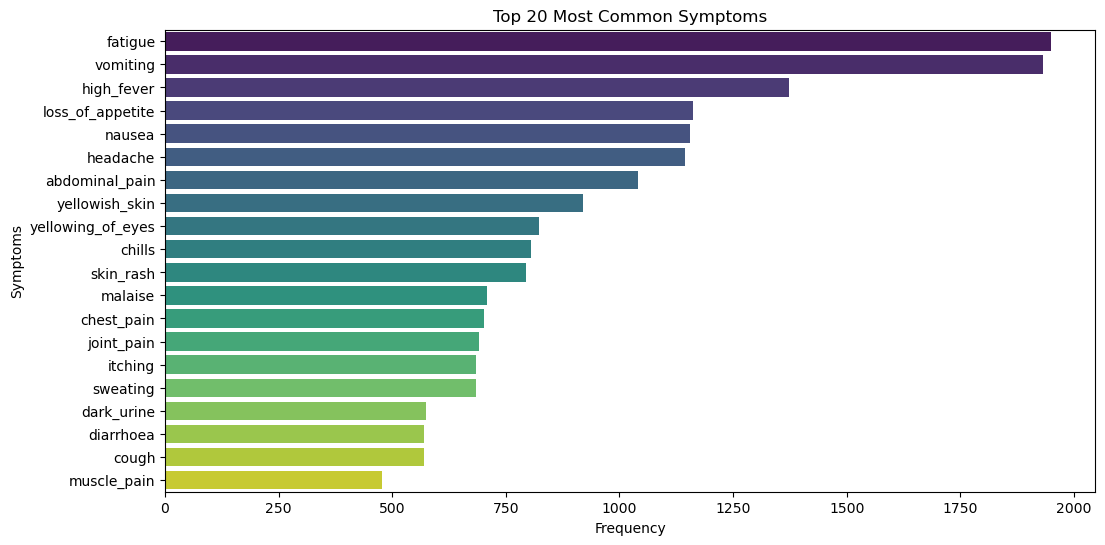

In [5]:
# Data Visualization (Graphs)

import matplotlib.pyplot as plt
import seaborn as sns

# Symptom Frequency Plot
symptom_counts = df.iloc[:, :-1].sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index, hue=symptom_counts.index, legend=False, palette="viridis")
plt.xlabel("Frequency")
plt.ylabel("Symptoms")
plt.title("Top 20 Most Common Symptoms")
plt.show()


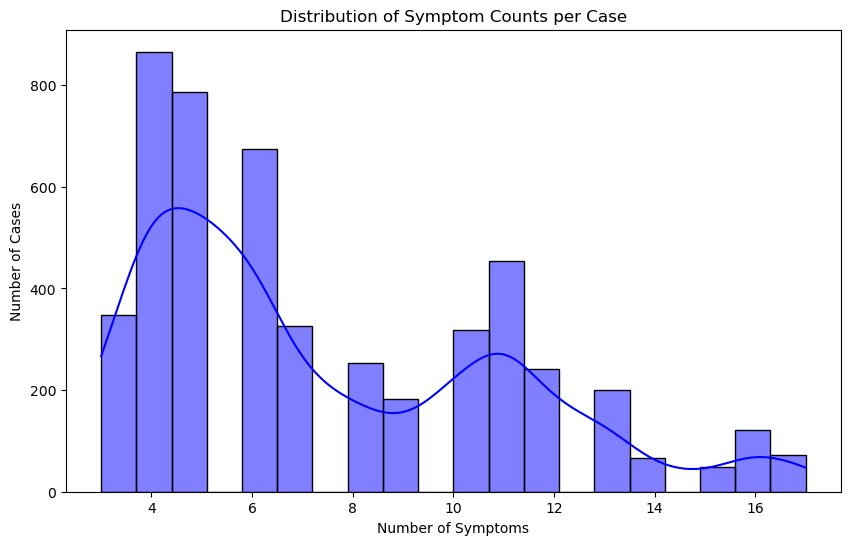

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the number of symptoms per case
df['symptom_count'] = df.iloc[:, :-1].sum(axis=1)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['symptom_count'], bins=20, kde=True, color="blue")
plt.xlabel("Number of Symptoms")
plt.ylabel("Number of Cases")
plt.title("Distribution of Symptom Counts per Case")
plt.show()

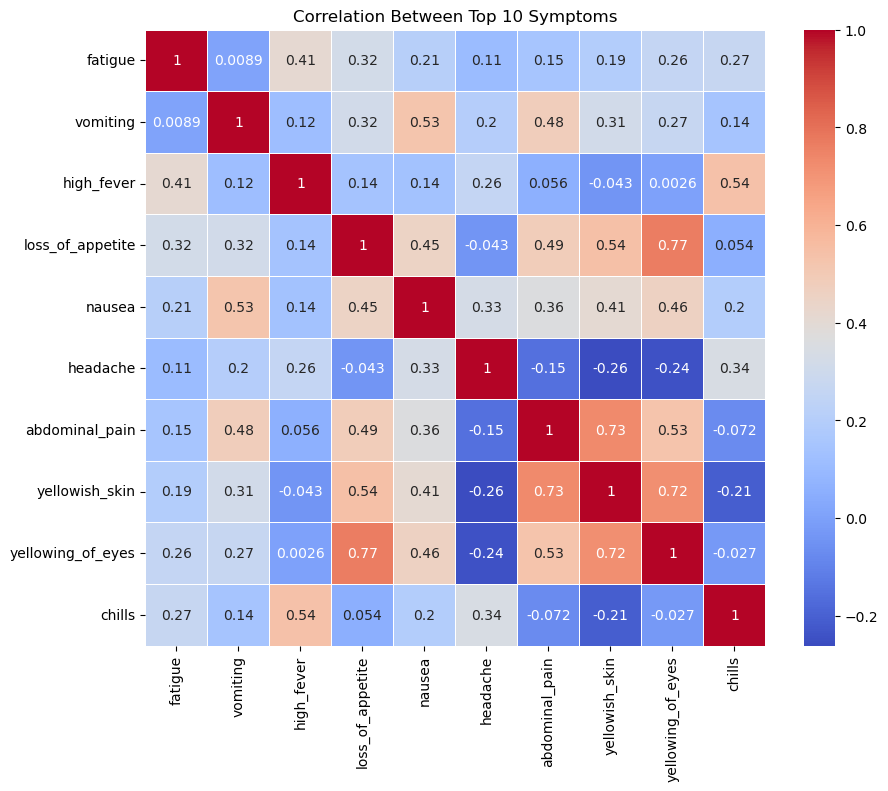

In [11]:
# Heatmap of Symptom Correlation (Top 10 Symptoms for readability)
top_symptoms = symptom_counts.index[:10]
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_symptoms].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Top 10 Symptoms")
plt.show()

In [45]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.40, random_state=142)


In [47]:
# Train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
# Make predictions
predictions = model.predict(x_test)

In [51]:
# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.95%
